In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
print(tf.__version__)

2.0.0


In [4]:
# We need to get some labeled training data!
mnist = tf.keras.datasets.fashion_mnist

In [5]:
rv = mnist.load_data()

In [6]:
print(rv)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [7]:
(train_images, train_labels) = rv[0]

In [8]:
(test_images, test_labels) = rv[1]

In [17]:
print(test_images.shape)

(10000, 28, 28)


<IPython.core.display.Javascript object>


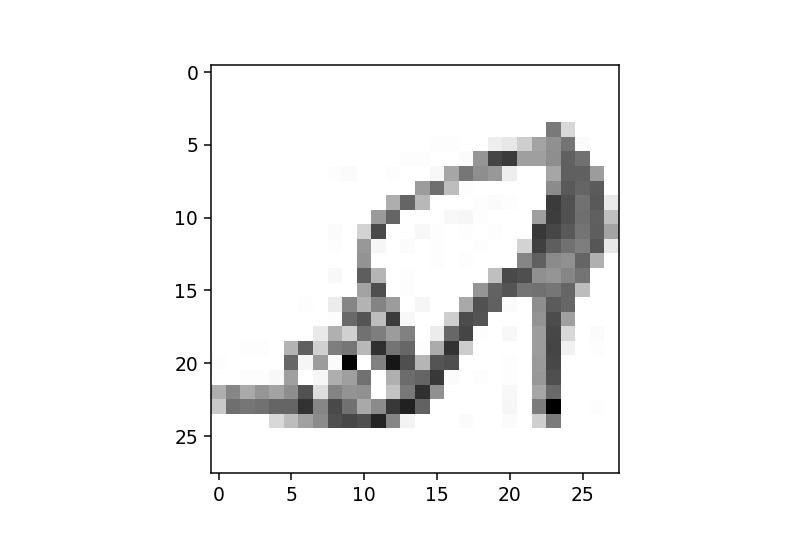

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[8000],cmap=plt.cm.binary)

In [14]:
print(train_labels)

[9 0 0 ... 3 0 5]


<IPython.core.display.Javascript object>


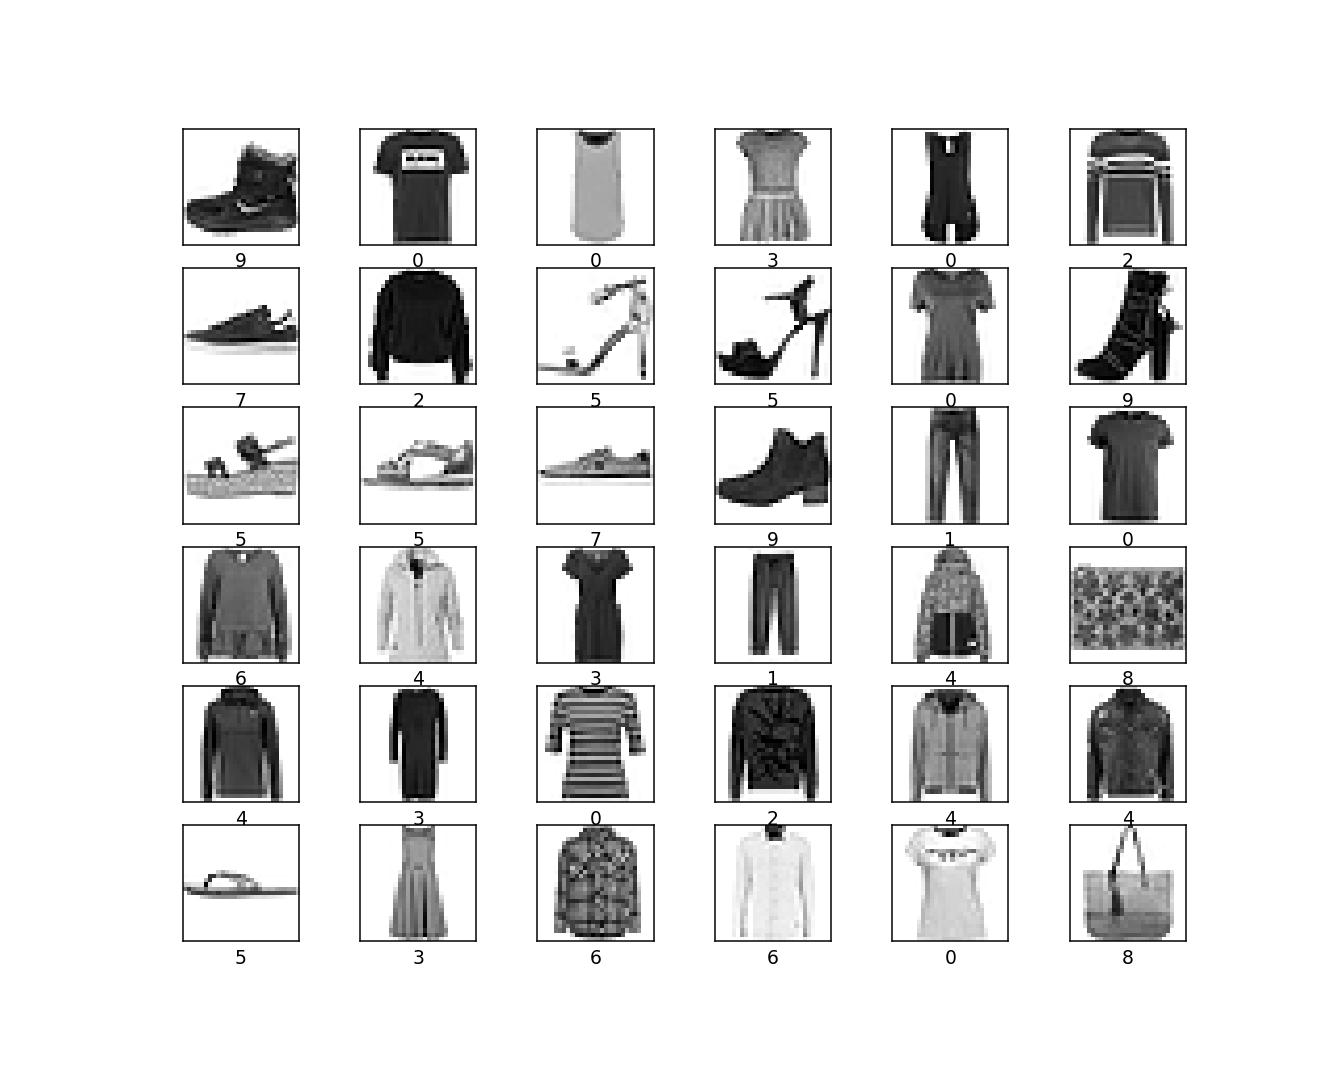

In [16]:
%matplotlib notebook
plt.figure()
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [18]:
class_names = ['Tops', 'Bottoms', 'Sweaters', 'Dresses', 'Coats', 'Open-Toed Shoes', 'Long Sleeve Tops', 'Sneaker', 'Bags', 'Boot']

In [21]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128,activation='relu'),tf.keras.layers.Dense(10)])

In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 233us/sample - loss: 3.0339 - accuracy: 0.6631
Epoch 2/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.6690 - accuracy: 0.7489
Epoch 3/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.5880 - accuracy: 0.7922
Epoch 4/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.5393 - accuracy: 0.8130
Epoch 5/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.5169 - accuracy: 0.8255
Epoch 6/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.4952 - accuracy: 0.8310
Epoch 7/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.4802 - accuracy: 0.8373
Epoch 8/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.4827 - accuracy: 0.8374
Epoch 9/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.4632 - accuracy: 0.8

In [24]:
model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 1s - loss: 0.5232 - accuracy: 0.8328


[0.5213004281759263, 0.8328]

In [25]:
test_images_norm = test_images / 255.0
train_images_norm = train_images / 255.0

In [26]:
model2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128,activation='relu'),tf.keras.layers.Dense(10)])
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [27]:
model2.fit(train_images_norm, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.5001 - accuracy: 0.8233
Epoch 2/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.3761 - accuracy: 0.8639
Epoch 3/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.3368 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.3135 - accuracy: 0.8857
Epoch 5/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.2943 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.2812 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.2694 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 15s 242us/sample - loss: 0.2574 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2495 - accuracy: 0.9

In [28]:
model2.evaluate(test_images_norm, test_labels, verbose=2)

10000/1 - 2s - loss: 0.2456 - accuracy: 0.8812


[0.34283092164993284, 0.8812]

In [34]:
probability_model2 = tf.keras.Sequential([model2,tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model2.predict(test_images_norm)

In [36]:
print(predictions[0])

[3.9305364e-06 1.1490139e-07 4.0029995e-08 3.7091993e-11 5.3346145e-09
 4.8652475e-04 3.3428452e-07 6.1088302e-03 4.1560977e-08 9.9340022e-01]


<IPython.core.display.Javascript object>


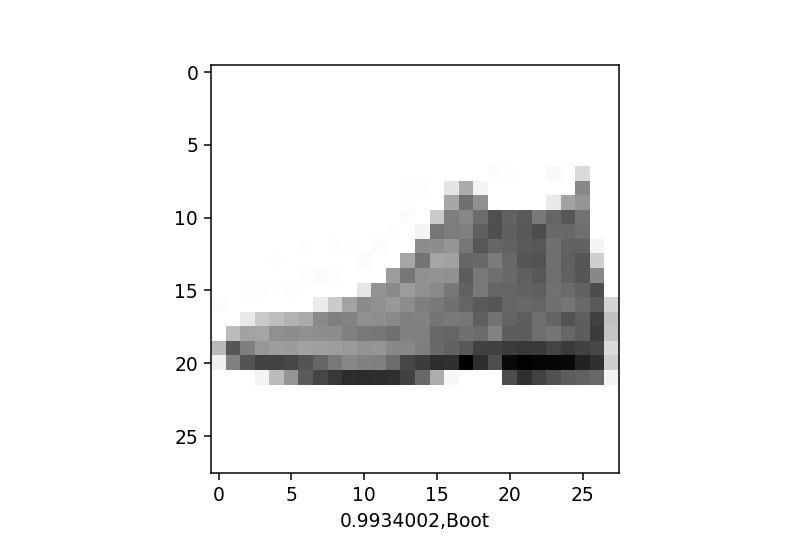

Text(0.5, 0, '0.9934002,Boot')

In [43]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.xlabel(str(predictions[0][np.argmax(predictions[0])])+","+str(class_names[np.argmax(predictions[0])]))